In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
def m_to_cm(x):
    x*=100
    return x

Question 1 (15 points): Read in the data from the given CSV file. Down-select to create a
dataframe that only includes three columns (sport, height, and weight) for all of the males
who competed in either basketball or cycling, then perform dropna() to remove any missing
rows. This should result in a dataframe with 3 columns and 450 rows. Convert the nonnumerical feature (sport) to numerical values. Further, convert the height values from meters
to centimeters. Include in your report a brief description (1-2 sentences) of why it might be
a good idea to use the data in centimeters rather than meters for k-nearest neighbors.

In [14]:
data = pd.read_csv("athletes.csv")
data = data[data['sex'] == 'male']
sport = data.loc[data["sport"].isin(["basketball","cycling"])]

# print(basketball_or_cycling)

# print(data)
diseases =['sport','height','weight']
data_no_nan = sport.filter(items= diseases)
data_no_nan = data_no_nan.dropna()

data_no_nan['sport'] = data_no_nan['sport'].replace("basketball",0)
data_no_nan['sport'] = data_no_nan['sport'].replace("cycling",1)

data_no_nan['height'] = data_no_nan['height'].apply(m_to_cm)
print(data_no_nan)

       sport  height  weight
4          1   181.0    71.0
40         1   172.0    66.0
91         1   172.0    58.0
95         0   194.0    90.0
135        1   165.0    68.0
...      ...     ...     ...
11435      1   180.0    89.0
11455      1   183.0    72.0
11460      0   203.0   105.0
11475      0   214.0   100.0
11476      1   172.0    65.0

[450 rows x 3 columns]


Question 2 (15 points): For each class (basketball, cycling) and feature (height, weight),
compute the following statistics: minimum, maximum, mean, standard deviation, and signalto-noise ratio (SNR = mean/standard deviation). Create a table that shows the statistics
for each class and feature. Do any of the statistics give rise to concern? Provide a brief
description (1-2 sentences) in the report

In [15]:
basketball = data_no_nan[data_no_nan["sport"] == 0]
cycling = data_no_nan[data_no_nan["sport"] == 1]

std0 = np.std(basketball,axis=0)
mean0 = np.mean(basketball,axis=0)
max0 =np.max(basketball,axis=0)
min0 = np.min(basketball,axis=0)


std1 = np.std(cycling,axis=0)
mean1 = np.mean(cycling,axis=0)
max1 =np.max(cycling,axis=0)
min1 = np.min(cycling,axis=0)

print("      sport      height      weight")
print("min      0      {:06.2f}       {:06.2f}".format(min0[1], min0[2]))
print("max      0      {:06.2f}       {:06.2f}".format(max0[1], max0[2]))
print("mean     0      {:06.2f}       {:06.2f}".format(mean0[1], mean0[2]))
print("std      0      {:06.2f}       {:06.2f}".format(std0[1], std0[2]))
print("SNR      0      {:06.2f}       {:06.2f}".format(mean0[1]/std0[1], mean0[2]/std0[2]))

print("min      1      {:06.2f}       {:06.2f}".format(min1[1], min1[2]))
print("max      1      {:06.2f}       {:06.2f}".format(max1[1], max1[2]))
print("mean     1      {:06.2f}       {:06.2f}".format(mean1[1], mean1[2]))
print("std      1      {:06.2f}       {:06.2f}".format(std1[1], std1[2]))
print("SNR      1      {:06.2f}       {:06.2f}".format(mean1[1]/std1[1], mean1[2]/std1[2]))


      sport      height      weight
min      0      181.00       079.00
max      0      218.00       137.00
mean     0      200.42       100.30
std      0      008.33       011.92
SNR      0      024.06       008.41
min      1      164.00       052.00
max      1      196.00       100.00
mean     1      179.31       072.58
std      1      006.48       009.28
SNR      1      027.66       007.82


Question 3 (10 points): Create a scatter plot of the data, where you color the basketball
data and cycling data differently. Make sure to label your axes and include a legend for the
labels. Does the scatter plot indicate potential success or failure with respect to separating
the two classes using KNN? Why? Provide a brief description (1-2 sentences) in the report.

95        90.0
214       85.0
250      102.0
349       93.0
355      102.0
         ...  
11065    100.0
11163     91.0
11332    107.0
11460    105.0
11475    100.0
Name: weight, Length: 141, dtype: float64 95       194.0
214      192.0
250      210.0
349      198.0
355      192.0
         ...  
11065    204.0
11163    200.0
11332    203.0
11460    203.0
11475    214.0
Name: height, Length: 141, dtype: float64
4        71.0
40       66.0
91       58.0
135      68.0
192      69.0
         ... 
11367    64.0
11422    74.0
11435    89.0
11455    72.0
11476    65.0
Name: weight, Length: 309, dtype: float64 4        181.0
40       172.0
91       172.0
135      165.0
192      177.0
         ...  
11367    171.0
11422    181.0
11435    180.0
11455    183.0
11476    172.0
Name: height, Length: 309, dtype: float64


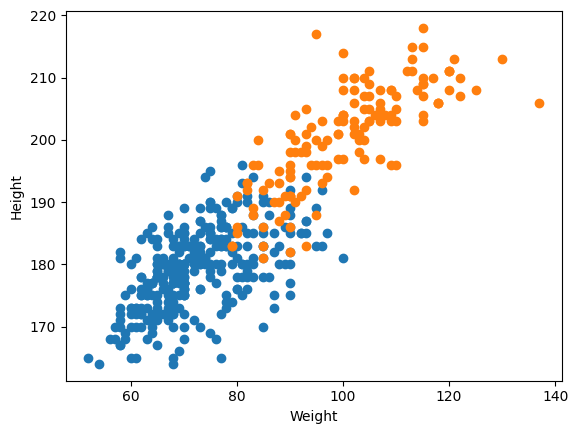

In [22]:
b_weight = basketball.loc[:,'weight']
b_height = basketball.loc[:,'height']

c_weight = cycling.loc[:,'weight']
c_height = cycling.loc[:,'height']

plt.scatter(c_weight,c_height)
plt.scatter(b_weight,b_height)

plt.xlabel("Weight")
plt.ylabel("Height")

print(b_weight,b_height)
print(c_weight,c_height)

Question 4 (5 points): Divide the data into training and test data using the standard 80-20
ratio. Apply 10-fold cross-validation to the training data

In [28]:
X = np.c_[data_no_nan["height"], data_no_nan["weight"]]
y = np.array(data_no_nan["sport"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn.model_selection import KFold
splits = KFold(n_splits=10)

Question 5 (25 points): Create and iterate over different numbers of neighbors from 1 to 21
(inclusive, but odd numbers only). For each hyperparameter, calculate the mean and standard deviation of classification accuracy across the different folds of the data. Create a table
for your report showing the mean and standard deviation for each hyperparameter. Select
1
which hyperparameter to use based on the mean classification accuracy on the validation
data. Note which hyperparameter value is selected in the report.


In [29]:
for n in range(1,22,2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        neigh = KNeighborsClassifier(n_neighbors=n)
        X_subtrain = X_train[train_index]
        X_val = X_train[val_index]
        y_subtrain = y_train[train_index]
        y_val = y_train[val_index]
        neigh.fit(X_subtrain, y_subtrain)
        y_predict = neigh.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
    print(n, np.mean(scores),np.std(scores))

1 0.888888888888889 0.049690399499995305
3 0.8972222222222221 0.04312270748961116
5 0.9055555555555556 0.05299662230094141
7 0.913888888888889 0.047222222222222214
9 0.9166666666666666 0.043033148291193514
11 0.9166666666666666 0.043033148291193514
13 0.9166666666666666 0.043033148291193514
15 0.9194444444444445 0.0472222222222222
17 0.925 0.04312270748961118
19 0.9194444444444445 0.04383259399460971
21 0.9194444444444445 0.040157867485558225


Question 6 (10 points): ): Build a new K-nearest neighbor classifier using all your training
data with the hyperparameter defined in Question 5. Use the resulting model to classify the
test data (which haven’t used until now). Calculate and report overall training and test data
performance

In [30]:
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

Question 7 (20 points): Create a 2D plot that visualizes the classifier’s performance (a
decision boundary). Run a mesh of data through the classifier to determine basketball and
cycling decision regions. Color them two different light colors (alpha=0.2) that are easy to
visually separate. Then, overlay the test data using two different colors for basketball and
cycling. Make sure all plots are labeled and that a legend is included.

[1 1 1 ... 0 0 0]


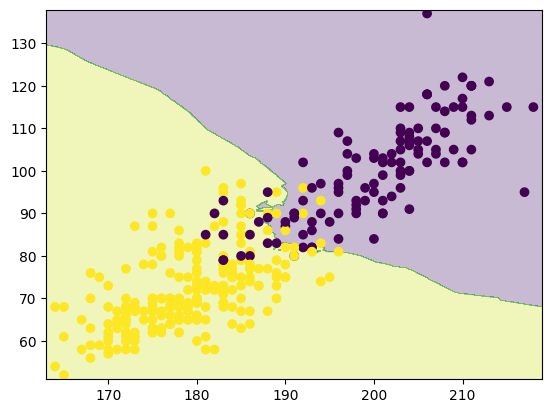

In [31]:
# Creating the meshgrid We can use numpy's
# meshgrid() and arange() to build out a set of values to evaluate.
x_min = np.min(X[:,0]) - 1
x_max = np.max(X[:,0]) + 1
y_min = np.min(X[:,1]) - 1
y_max = np.max(X[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

new_X = np.c_[xx.ravel(), yy.ravel()]

neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_train, y_train)
new_y = neigh.predict(new_X)
print(new_y)

zz = new_y.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)